In [2]:

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:

df_raw = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df = df_raw.copy()
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
df['BMI Category']=df['BMI Category'].replace({'Normal Weight':'Normal'})

In [7]:

df = df.drop(columns='Person ID', axis=1)

In [8]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [9]:
# Extracting systolic and diastolic values from the 'Blood Pressure' column
df['Systolic'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[0]))
df['Diastolic'] = df['Blood Pressure'].apply(lambda x: int(x.split('/')[1]))

# Define function to categorize blood pressure
def categorize_blood_pressure(row):
    if row['Systolic'] < 120 and row['Diastolic'] < 80:
        return 'Normal'
    elif 120 <= row['Systolic'] < 130 and row['Diastolic'] < 80:
        return 'Elevated'
    else:
        return 'Hypertension'

# Apply function to categorize blood pressure
df['Blood Pressure Category'] = df.apply(categorize_blood_pressure, axis=1)

# Drop intermediate columns
df.drop(columns=['Systolic', 'Diastolic'], inplace=True)

df.sample()
     

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Category
170,Male,41,Lawyer,7.7,8,90,5,Normal,130/85,70,8000,None,Hypertension


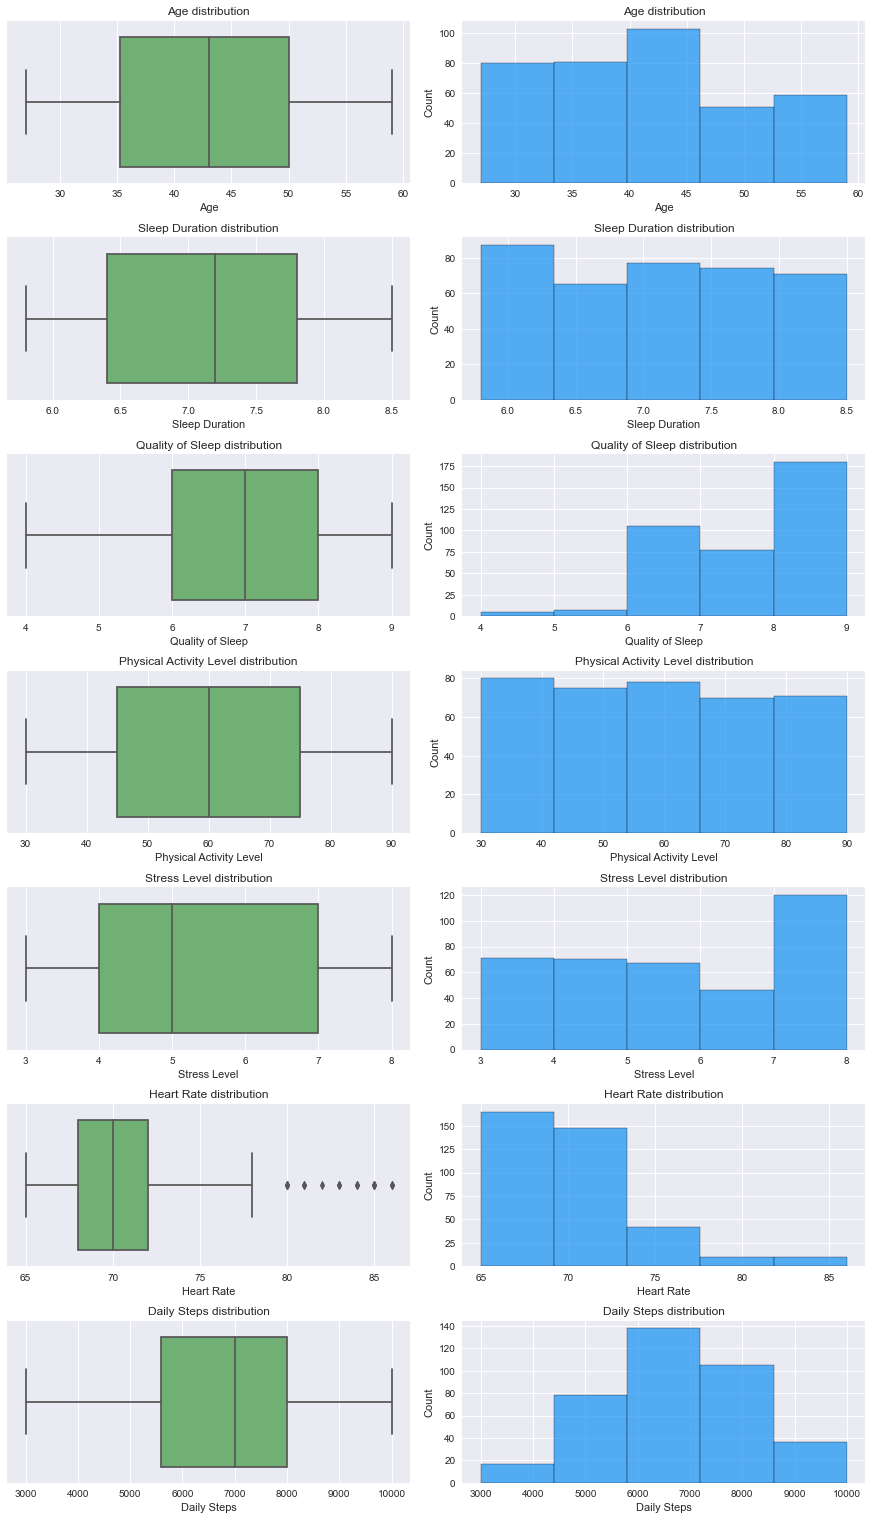

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot
num_column = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Create a 7x2 subplot with two subplots on one line
fig, axs = plt.subplots(7, 2, figsize=(12, 3 * 7), constrained_layout=True)

# Define colors for visualization
colors = ['#66BB6A', '#2196F3']

import warnings

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

# Iterate through each numerical column
for col in num_column:
    # Swarmplot and boxplot on the left
    sns.boxplot(data=df, x=col, ax=axs[num_column.index(col), 0], color=colors[0])
    # Histogram on the right
    sns.histplot(data=df, x=col, bins=5, ax=axs[num_column.index(col), 1], color=colors[1])

    axs[num_column.index(col), 0].set_title(col + ' distribution')
    axs[num_column.index(col), 1].set_title(col + ' distribution')

plt.show()


C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


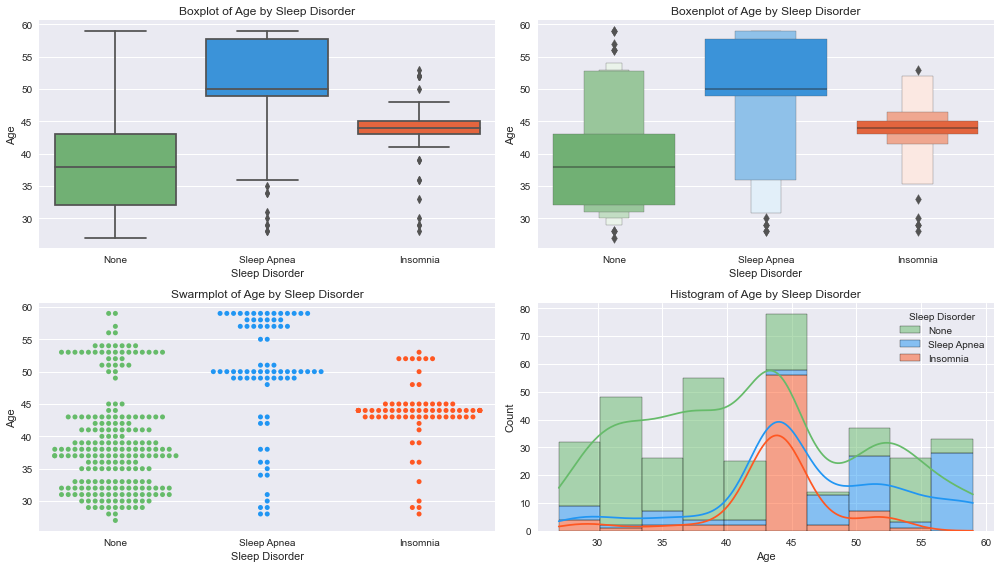

C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


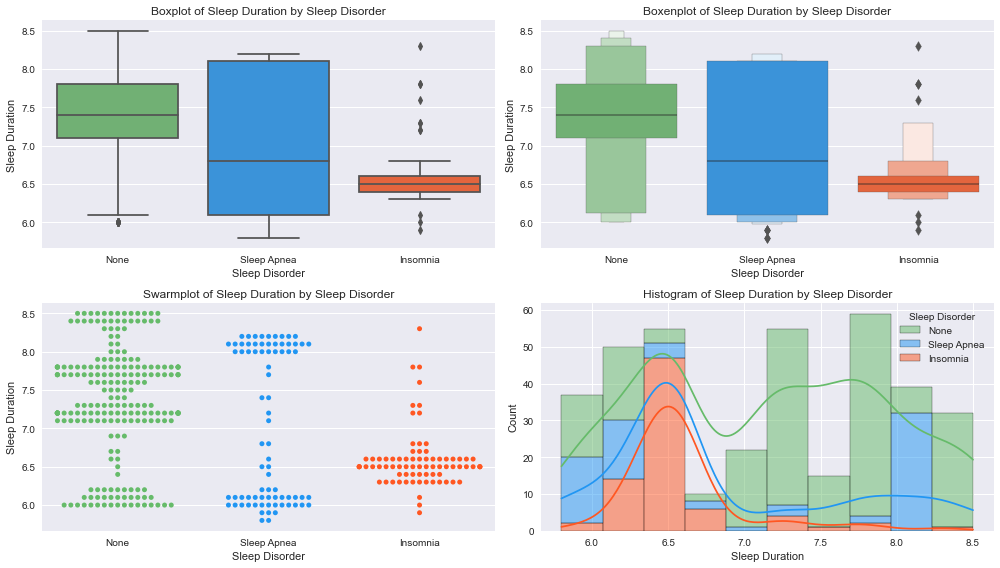

C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


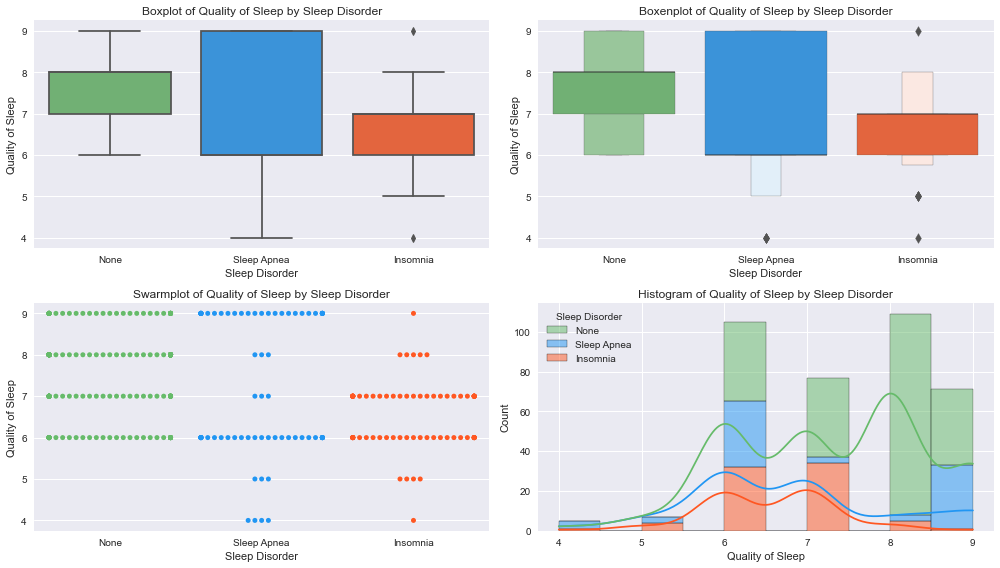

C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


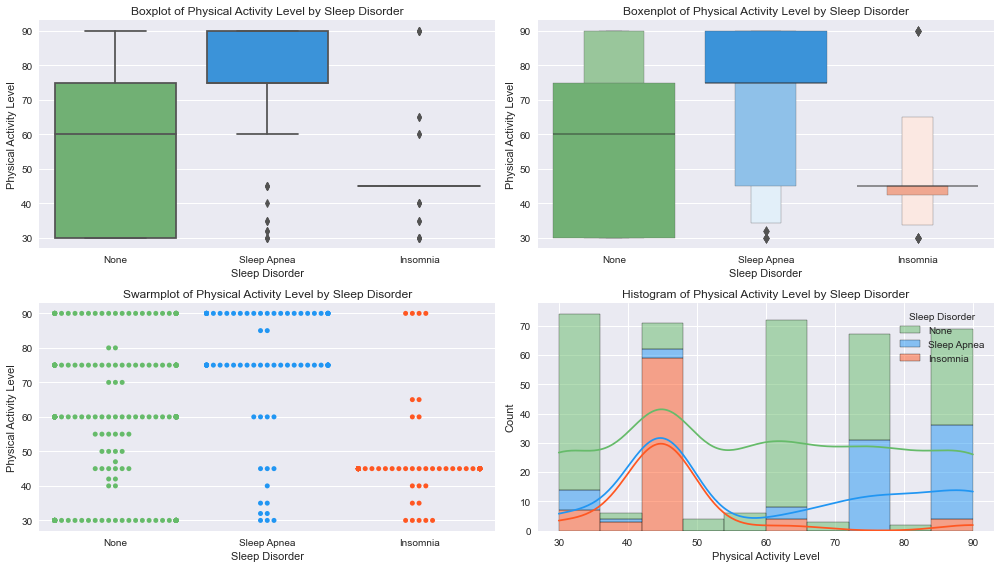

C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


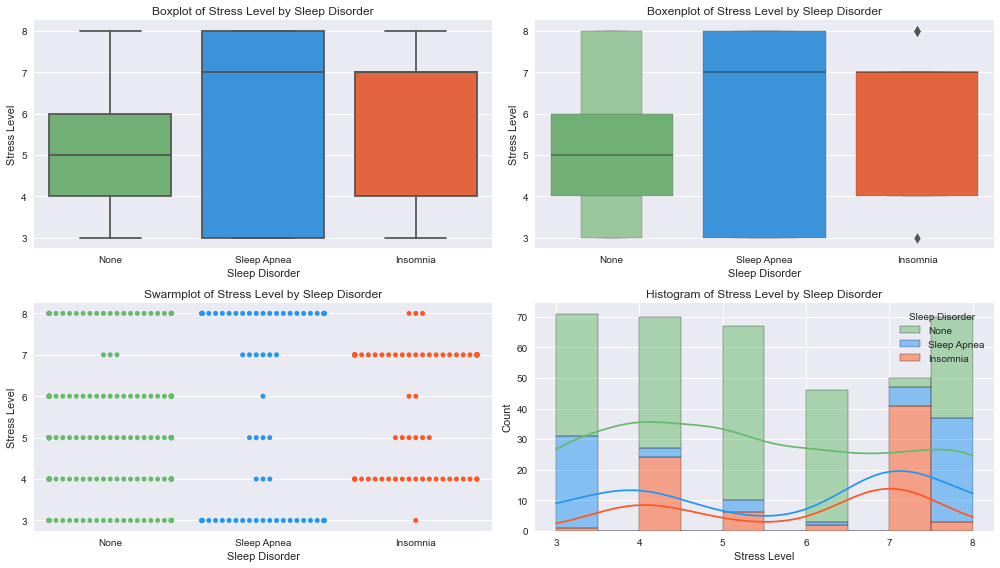

C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


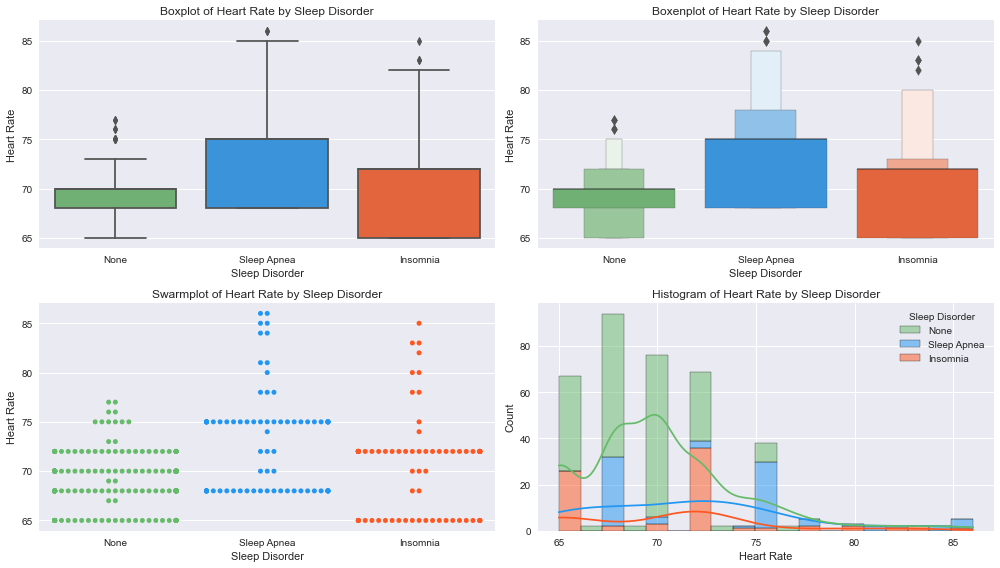

C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sowmy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


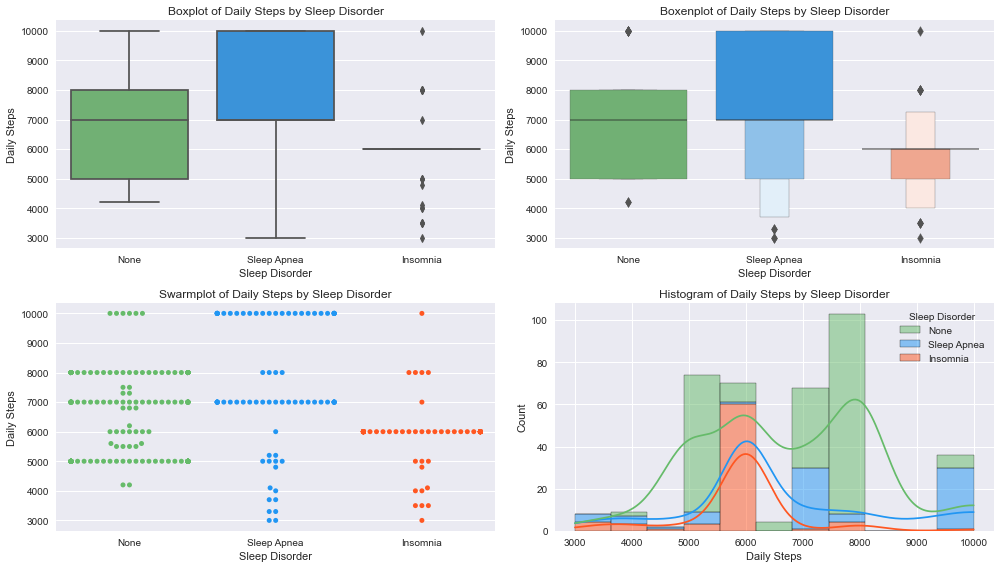

TypeError: Neither the `x` nor `y` variable appears to be numeric.

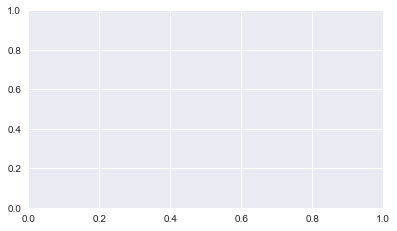

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define colors for visualization
colors = ['#66BB6A', '#2196F3', '#FF5722']  # Green, Blue, Orange

# List of feature columns
feature_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood Pressure Category']

# Plotting different types of graphs for each feature column vs. Sleep Disorder
for feature in feature_columns:
    plt.figure(figsize=(14, 8))

    # Box plot
    plt.subplot(2, 2, 1)
    sns.boxplot(x='Sleep Disorder', y=feature, data=df, palette=colors)
    plt.title('Boxplot of {} by Sleep Disorder'.format(feature))

    # Boxen plot
    plt.subplot(2, 2, 2)
    sns.boxenplot(x='Sleep Disorder', y=feature, data=df, palette=colors)
    plt.title('Boxenplot of {} by Sleep Disorder'.format(feature))

    # Swarm plot
    plt.subplot(2, 2, 3)
    sns.swarmplot(x='Sleep Disorder', y=feature, data=df, palette=colors)
    plt.title('Swarmplot of {} by Sleep Disorder'.format(feature))

    # Histogram
    plt.subplot(2, 2, 4)
    sns.histplot(x=feature, hue='Sleep Disorder', data=df, multiple='stack', kde=True, palette=colors)
    plt.title('Histogram of {} by Sleep Disorder'.format(feature))

    plt.tight_layout()
    plt.show()



Mean: 7.31283422459893
Median: 7.0
Mode: 8
Skewness: -0.20661469385504258
Kurtosis: -0.7543092338335313


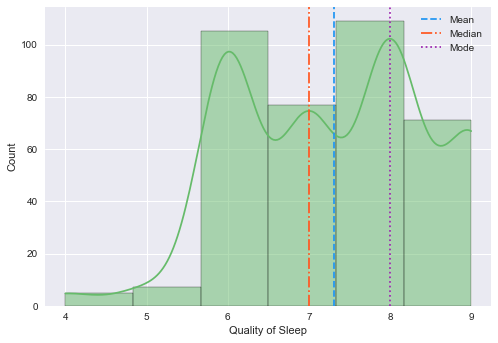

In [16]:
# Calculate the mean, median, and mode of Quality of Sleep
mean = df['Quality of Sleep'].mean()
median = df['Quality of Sleep'].median()
mode = df['Quality of Sleep'].mode()[0]

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

colors = ["#66BB6A", '#2196F3', '#FF5722','#9C27B0']

# Create the histogram
sns.histplot(x = 'Quality of Sleep', color= colors[0],data = df, bins = 6, kde = True)

# Add mean, median, and mode to the graph
plt.axvline(x = mean, color = colors[1], linestyle = '--', label = 'Mean')
plt.axvline(x = median, color = colors[2], linestyle = '-.', label = 'Median')
plt.axvline(x = mode, color = colors[3], linestyle = ':', label = 'Mode')
plt.legend()

# Calculate the skewness and kurtosis
skewness = stats.skew(df['Quality of Sleep'])
kurtosis = stats.kurtosis(df['Quality of Sleep'])

# Print the skewness and kurtosis
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)
print('Skewness:', skewness)
print('Kurtosis:', kurtosis)

# Show the plot
plt.show()

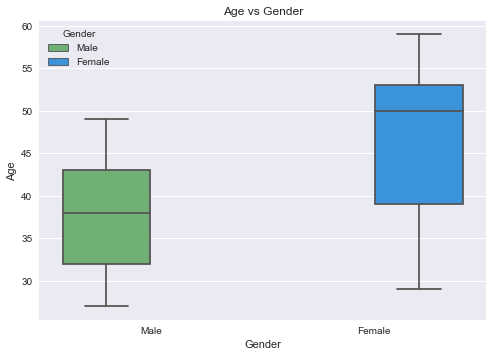

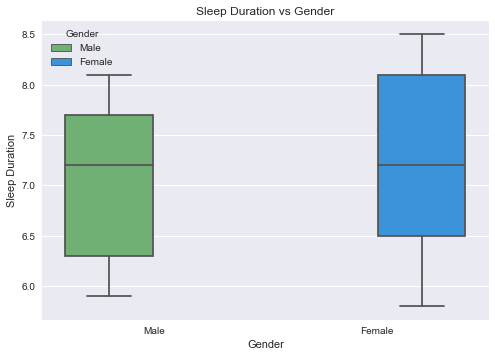

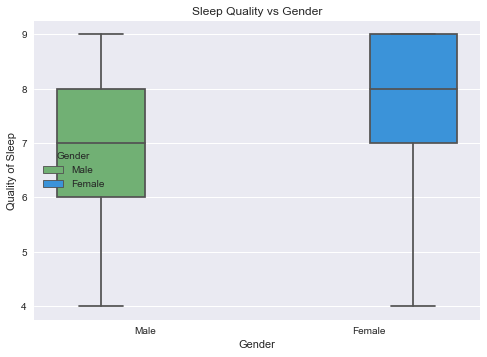

In [17]:
sns.boxplot(x="Gender", y="Age", data=df, hue="Gender", palette=[colors[0], colors[1]]).set_title("Age vs Gender")
plt.show()
sns.boxplot(x="Gender", y="Sleep Duration", data=df, hue="Gender",palette=[colors[0], colors[1]]).set_title("Sleep Duration vs Gender")
plt.show()
sns.boxplot(x="Gender", y="Quality of Sleep", data=df, hue="Gender",palette=[colors[0], colors[1]]).set_title("Sleep Quality vs Gender")
plt.show()


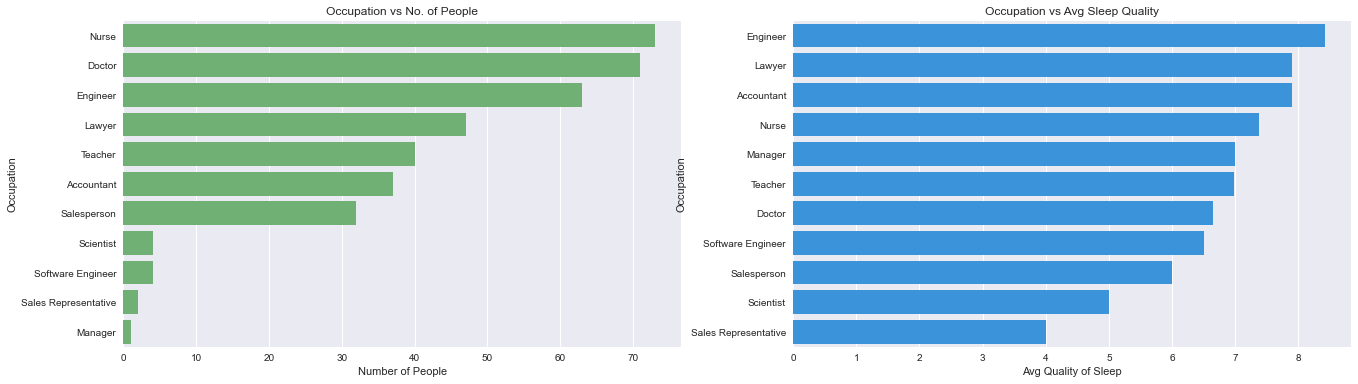

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(22, 6))

# Occupations
occ = df.groupby("Occupation", as_index=False).size()
occ.sort_values("size", ascending=False, inplace=True)
sns.barplot(data=occ, y="Occupation", x="size", order=occ['Occupation'].values, ax=axs[0], color=colors[0])
axs[0].set(title="Occupation vs No. of People", xlabel="Number of People", ylabel="Occupation")

# Avg Quality Sleep by Occupations
occ_sleep = df.groupby("Occupation").agg({"Quality of Sleep": "mean"}).sort_values("Quality of Sleep", ascending=False)
sns.barplot(data=occ_sleep, y=occ_sleep.index, x="Quality of Sleep", ax=axs[1], color=colors[1])
axs[1].set(title="Occupation vs Avg Sleep Quality", xlabel="Avg Quality of Sleep", ylabel="Occupation")

plt.show()

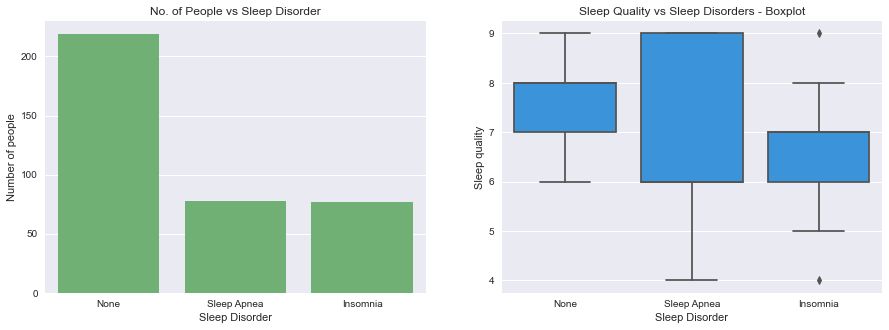

In [19]:
fig, axs = plt.subplots(1,2, figsize=(15, 5))

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.countplot(data=df, x="Sleep Disorder", color=colors[0],ax=axs[0]).set_title("No. of People vs Sleep Disorder")
axs[0].set(xlabel="Sleep Disorder", ylabel="Number of people")


sns. boxplot (data=df, x="Sleep Disorder", y="Quality of Sleep", color=colors[1], ax=axs[1]).set_title("Sleep Quality vs Sleep Disorders - Boxplot")
axs[1].set(xlabel="Sleep Disorder", ylabel="Sleep quality")

plt.show()

0      Overweight
1          Normal
2          Normal
3           Obese
4           Obese
          ...    
369    Overweight
370    Overweight
371    Overweight
372    Overweight
373    Overweight
Name: BMI Category, Length: 374, dtype: object


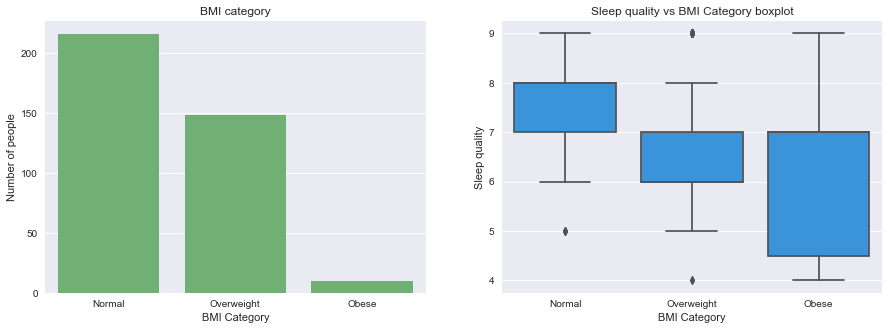

In [20]:
categoria_ordine_sleep_disorders = ["Normal", "Overweight", "Obese"]
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

print(df['BMI Category'])

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

# Plot 1
sns.countplot(data=df, order=categoria_ordine_sleep_disorders, x="BMI Category", color=colors[0], ax=axs[0]).set_title("BMI category")
axs[0].set(xlabel="BMI Category", ylabel="Number of people")


# Plot 3
sns.boxplot(data=df, order=categoria_ordine_sleep_disorders, x="BMI Category", y="Quality of Sleep", color=colors[1], ax=axs[1]).set_title("Sleep quality vs BMI Category boxplot")
axs[1].set(xlabel="BMI Category", ylabel="Sleep quality")

plt.show()


In [21]:
Categorical_Col = []
Numerical_Col = []
for col in df.columns:
    if df[col].dtype == 'object':
        Categorical_Col.append(col)

    else:
        Numerical_Col.append(col)
     

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
LE = LabelEncoder()
for col in Categorical_Col:
    df[col] = LE.fit_transform(df[col])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Category
0,1,27,9,6.1,6,42,6,2,11,77,4200,1,1
1,1,28,1,6.2,6,60,8,0,9,75,10000,1,1
2,1,28,1,6.2,6,60,8,0,9,75,10000,1,1
3,1,28,6,5.9,4,30,8,1,22,85,3000,2,1
4,1,28,6,5.9,4,30,8,1,22,85,3000,2,1


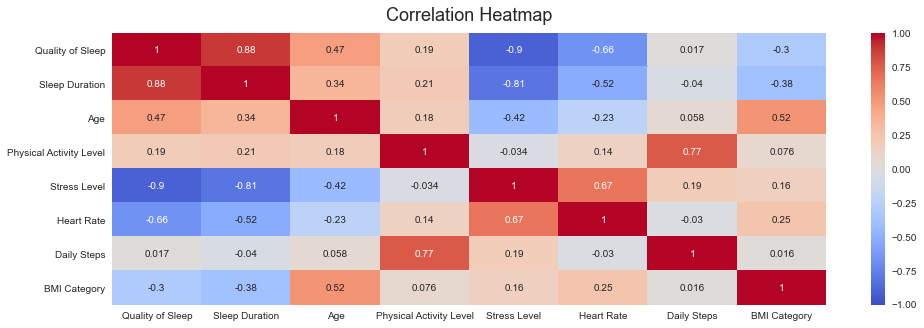

In [24]:
correlation_table = df[["Quality of Sleep", "Sleep Duration", "Age", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "BMI Category"]].corr()

plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(correlation_table, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

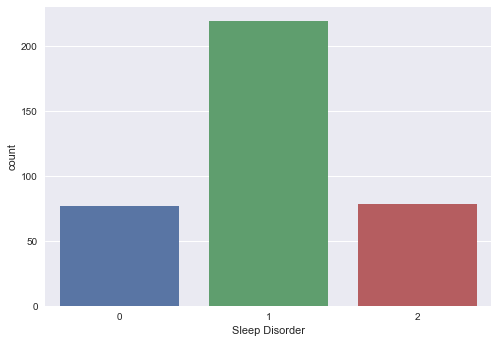

In [25]:
sns.countplot(data=df, x='Sleep Disorder')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Sleep Disorder', 'Blood Pressure Category'])
X
  

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,2,11,77,4200
1,1,28,1,6.2,6,60,8,0,9,75,10000
2,1,28,1,6.2,6,60,8,0,9,75,10000
3,1,28,6,5.9,4,30,8,1,22,85,3000
4,1,28,6,5.9,4,30,8,1,22,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,2,23,68,7000
370,0,59,5,8.0,9,75,3,2,23,68,7000
371,0,59,5,8.1,9,75,3,2,23,68,7000
372,0,59,5,8.1,9,75,3,2,23,68,7000


In [27]:

y = df['Sleep Disorder']
y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int32

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
RNF = RandomForestClassifier()
RNF.fit(X_train, y_train)
y_hat = RNF.predict(X_test)

Accuracy : 0.8936170212765957





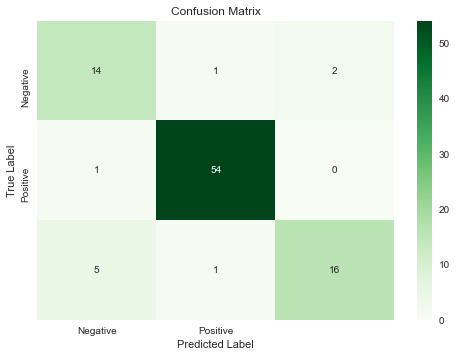

[[14  1  2]
 [ 1 54  0]
 [ 5  1 16]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.96      0.98      0.97        55
           2       0.89      0.73      0.80        22

    accuracy                           0.89        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.90      0.89      0.89        94



In [30]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy : "+ str(accuracy_score(y_test, y_hat)))

cm = confusion_matrix(y_test, y_hat)

sns.heatmap(cm, annot=True, cmap="Greens", fmt="d", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

print('\n\n')

plt.xlabel("Predicted Label")

plt.ylabel("True Label")

plt.title("Confusion Matrix")

plt.show()

print(cm)

print(classification_report(y_test, y_hat))

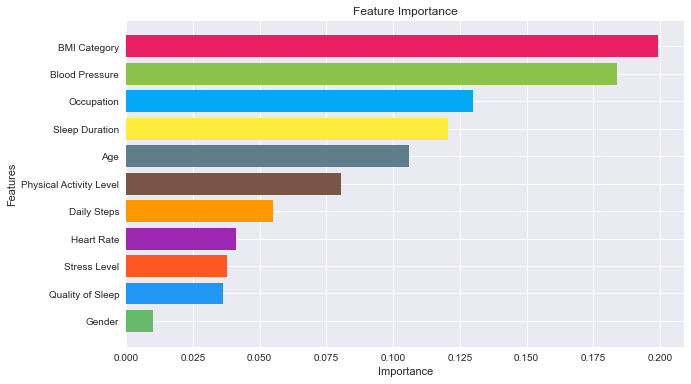

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train the RandomForestClassifier model
RNF = RandomForestClassifier()
RNF.fit(X_train, y_train)

# Get feature importances
importances = RNF.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
sorted_features = [X.columns[i] for i in indices]

# Define the original colors
original_colors = ['#66BB6A', '#2196F3', '#FF5722']

# Define additional colors manually
additional_colors = ['#9C27B0', '#FF9800', '#795548', '#607D8B', '#FFEB3B', '#03A9F4', '#8BC34A', '#E91E63']

# Concatenate original and additional colors
colors = original_colors + additional_colors

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], color=colors)
plt.yticks(range(X.shape[1]), sorted_features)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

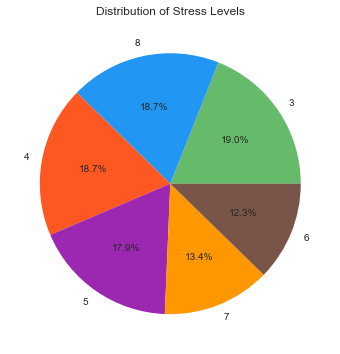

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
stress_counts = df['Stress Level'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(stress_counts, labels=stress_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Stress Levels')
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8829787234042553
Confusion Matrix:
[[15  1  1]
 [ 2 53  0]
 [ 6  1 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.88      0.75        17
           1       0.96      0.96      0.96        55
           2       0.94      0.68      0.79        22

    accuracy                           0.88        94
   macro avg       0.85      0.84      0.83        94
weighted avg       0.90      0.88      0.88        94



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Train the classifier
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8723404255319149
Confusion Matrix:
[[14  2  1]
 [ 2 53  0]
 [ 6  1 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        17
           1       0.95      0.96      0.95        55
           2       0.94      0.68      0.79        22

    accuracy                           0.87        94
   macro avg       0.84      0.82      0.82        94
weighted avg       0.89      0.87      0.87        94



C:\Users\sowmy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
